In [32]:
import json
import numpy as np
from scipy.spatial import distance
from collections import defaultdict

In [33]:
def d_action_dict(d_actions):
  dict_d_actions =  defaultdict(lambda : 0)
  for d_act in d_actions:
    d_act_ = ""
    for i in range(len(d_act)//2):
      if d_act[2*i+1]!=0:
        d_act_+=str(i)    
    dict_d_actions[d_act_]+=1
  return dict_d_actions

In [34]:
def extract_result_RL(data_file):
  """
  Outputs
    faillure_rate
    valid_rate 
    succ_rate
    average_reward
    inertie
    c_action_grav
    c_action_distance
    multiwoz_v
    top_k
    episode
  """
  print(data_file)
  # extract k, dataset, episode
  multiwoz_v = data_file.split("/")[-1].split("_")[1]
  top_k = str(data_file.split("/")[-1].split("_")[4])[0]
  episode = data_file.split("/")[-1].split("_")[5].split(".")[0]
  f = open(data_file)
  data = json.load(f)
  transcripts = []
  transcripts_tr = []
  trans_rates = []
  rewards = []
  joint_accs = []
  valid_joint_accs = []
  valids = []
  c_actions = []
  c_action_distance = []
  d_actions = []
  for dialogue in data : 
        for turn in dialogue["dialogue"]:
            transcripts.append(turn["transcript"])
            transcripts_tr.append(turn["transcript_tran"])
            trans_rates.append(turn["transformation_rate"])
            rewards.append(turn["reward"])
            joint_accs.append(turn["joint_acc"])
            trans_rate_ = turn["transformation_rate"]
            c_actions.append(turn["p_action"])
            d_actions.append(turn["d_action"])
            if trans_rate_[0]<0.25 and trans_rate_[1]<0.25: #valid transformation
              valids.append(1)
              valid_joint_accs.append(turn["joint_acc"])
            else : #unvalid transformation
              valids.append(0)

  #calculate distance between each action and center of gravity 
  c_action_grav = np.mean(c_actions, axis=0)
  for c_action in c_actions : 
    c_action_distance.append(distance.euclidean(c_action,c_action_grav))

  f.close()
  n_turns = len(transcripts)
  succ_rate = 1- sum(joint_accs)/n_turns
  valid_rate = sum(valids)/n_turns
  faillure_rate = 1- sum(valid_joint_accs)/len(valid_joint_accs)
  average_reward = sum(rewards)/n_turns
  inertie = sum(c_action_distance)/n_turns
  d_actions_dict =  d_action_dict(d_actions)
  return faillure_rate, valid_rate, succ_rate, average_reward,inertie, d_actions_dict, c_action_grav, c_action_distance, multiwoz_v, top_k, episode

In [35]:
def extract_result_RS(data_file):
  """
  Outputs
    faillure_rate
    valid_rate 
    succ_rate
    inertie
    c_action_grav
    c_action_distance
    multiwoz_v
    top_k
  """
  # extract k, dataset, episode
  multiwoz_v = data_file.split("/")[-1].split("_")[1]
  top_k = str(data_file.split("/")[-1].split("_")[2])[0]

  f = open(data_file)
  data = json.load(f)
  transcripts = []
  transcripts_tr = []
  trans_rates = []
  joint_accs = []
  valid_joint_accs = []
  valids = []
  c_actions = []
  c_action_distance = []
  for dialogue in data : 
        for turn in dialogue["dialogue"]:
            transcripts.append(turn["transcript"])
            transcripts_tr.append(turn["transcript_tran"])
            trans_rates.append(turn["transformation_rate"])
            joint_accs.append(turn["joint_acc"])
            trans_rate_ = turn["transformation_rate"]
            c_actions.append(turn["p_action"])
            if trans_rate_[0]<0.25 and trans_rate_[1]<0.25: #valid transformation
              valids.append(1)
              valid_joint_accs.append(turn["joint_acc"])
            else : #unvalid transformation
              valids.append(0)

  #calculate distance between each action and center of gravity 
  c_action_grav = np.mean(c_actions, axis=0)
  for c_action in c_actions : 
    c_action_distance.append(distance.euclidean(c_action,c_action_grav))

  f.close()
  n_turns = len(transcripts)
  succ_rate = 1-sum(joint_accs)/n_turns
  valid_rate = sum(valids)/n_turns
  faillure_rate = 1-sum(valid_joint_accs)/len(valid_joint_accs)
  inertie = sum(c_action_distance)/n_turns
  return faillure_rate, valid_rate, succ_rate,inertie, c_action_grav, c_action_distance, multiwoz_v, top_k

In [36]:
# /content/test_22_wwinsert_0.01_1.json
def extract_result_baseline(data_file):
  """
  Outputs
  faillure_rate
  valid_rate, 
  succ_rate 
  n_trans 
  multiwoz_v 
  top_k
  max_trans
  """
  # extrac multiwoz version, trans, threashold
  multiwoz_v = data_file.split("/")[-1].split("_")[1]
  max_trans = data_file.split("/")[-1].split("_")[2]
  threashold = data_file.split("/")[-1].split("_")[3]

  f = open(data_file)
  data = json.load(f)
  transcripts = []
  transcripts_tr = []
  trans_rates = []
  joint_accs = []
  valid_joint_accs = []
  valids = []
  n_trans = []
  
  for turn in data : 
            transcripts.append(turn["transcript"])
            transcripts_tr.append(turn["transcript_tran"])
            trans_rates.append(turn["transformation_rate"])
            joint_accs.append(turn["joint_acc"])
            n_trans.append(turn["n_trans"])
            trans_rate_ = turn["transformation_rate"]
            if trans_rate_<0.25 : #valid transformation
              valids.append(1)
              valid_joint_accs.append(turn["joint_acc"])
            else : #unvalid transformation
              valids.append(0)



  f.close()
  n_turns = len(transcripts)
  succ_rate = 1-sum(joint_accs)/n_turns
  valid_rate = sum(valids)/n_turns
  faillure_rate = 1-sum(valid_joint_accs)/len(valid_joint_accs)
  return faillure_rate, valid_rate, succ_rate, n_trans, multiwoz_v, threashold, max_trans

In [43]:
# trade k1
trade_1 =  ["test_21_Multi_PDQN_11_1000.json", "test_21_Multi_PDQN_11_2000.json", "test_21_Multi_PDQN_11_3000.json", "test_21_Multi_PDQN_11_4000.json",
"test_21_Multi_PDQN_11_5000.json", "test_21_Multi_PDQN_11_6000.json", "test_21_Multi_PDQN_11_7000.json", "test_21_Multi_PDQN_11_8000.json",
"test_21_Multi_PDQN_11_9000.json", "test_21_Multi_PDQN_11_10000.json"] 

trade_2 =  ["test_21_Multi_PDQN_21_1000.json", "test_21_Multi_PDQN_21_2000.json", "test_21_Multi_PDQN_21_3000.json", "test_21_Multi_PDQN_21_4000.json",
"test_21_Multi_PDQN_21_5000.json", "test_21_Multi_PDQN_21_6000.json", "test_21_Multi_PDQN_21_7000.json", "test_21_Multi_PDQN_21_8000.json",
"test_21_Multi_PDQN_21_9000.json", "test_21_Multi_PDQN_21_10000.json"] 

trade_3 =  ["test_21_Multi_PDQN_31_1000.json", "test_21_Multi_PDQN_31_2000.json", "test_21_Multi_PDQN_31_3000.json", "test_21_Multi_PDQN_31_4000.json",
"test_21_Multi_PDQN_31_5000.json", "test_21_Multi_PDQN_31_6000.json", "test_21_Multi_PDQN_31_7000.json", "test_21_Multi_PDQN_31_8000.json",
"test_21_Multi_PDQN_31_9000.json", "test_21_Multi_PDQN_31_10000.json"] 

trade_4 =  ["test_21_Multi_PDQN_41_1000.json", "test_21_Multi_PDQN_41_2000.json", "test_21_Multi_PDQN_41_3000.json", "test_21_Multi_PDQN_41_4000.json",
"test_21_Multi_PDQN_41_5000.json", "test_21_Multi_PDQN_41_6000.json", "test_21_Multi_PDQN_41_7000.json", "test_21_Multi_PDQN_41_8000.json",
"test_21_Multi_PDQN_41_9000.json", "test_21_Multi_PDQN_41_10000.json"] 

trade_5 =  ["test_21_Multi_PDQN_51_1000.json", "test_21_Multi_PDQN_51_2000.json", "test_21_Multi_PDQN_51_3000.json", "test_21_Multi_PDQN_51_4000.json",
"test_21_Multi_PDQN_51_5000.json", "test_21_Multi_PDQN_51_6000.json", "test_21_Multi_PDQN_51_7000.json", "test_21_Multi_PDQN_51_8000.json",
"test_21_Multi_PDQN_51_9000.json", "test_21_Multi_PDQN_51_10000.json"] 

trade_6 =  ["test_21_Multi_PDQN_61_1000.json", "test_21_Multi_PDQN_61_2000.json", "test_21_Multi_PDQN_61_3000.json", "test_21_Multi_PDQN_61_4000.json",
"test_21_Multi_PDQN_61_5000.json", "test_21_Multi_PDQN_61_6000.json", "test_21_Multi_PDQN_61_7000.json", "test_21_Multi_PDQN_61_8000.json",
"test_21_Multi_PDQN_61_9000.json", "test_21_Multi_PDQN_61_10000.json"] 


trade1_path ="/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_11"
trade2_path ="/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_21"
trade3_path ="/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_31"
trade4_path ="/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_41"
trade5_path ="/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_51"
trade6_path ="/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_61"

In [45]:
faillure_rates = []
valid_rates = []
succ_rates =[]
average_rewards = []
inerties = []

for f in trade_6:
    faillure_rate, valid_rate, succ_rate, average_reward,inertie, _, _, _, _, _, _ = extract_result_RL(trade6_path+"/"+ f)
    faillure_rates.append(faillure_rate)
    valid_rates.append(valid_rate)
    succ_rates.append(succ_rate)
    average_rewards.append(average_reward)
    inerties.append(inertie)

print(faillure_rates)
print(valid_rates)
print(succ_rates)
print(inerties)

/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_61/test_21_Multi_PDQN_61_1000.json
/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_61/test_21_Multi_PDQN_61_2000.json
/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_61/test_21_Multi_PDQN_61_3000.json
/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_61/test_21_Multi_PDQN_61_4000.json
/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_61/test_21_Multi_PDQN_61_5000.json
/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_61/test_21_Multi_PDQN_61_6000.json
/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_61/test_21_Multi_PDQN_61_7000.json
/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_61/test_21_Multi_PDQN_61_8000.json
/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_61/test_21_Multi_PDQN_61_9000.json
/home/altaf/Desktop/Results/run1_second_config/trade/Evaluation/k_61/test_21_Multi_PDQN_61_

In [8]:
for r in average_rewards:
    print(r)

-265.77866291261046
-177.59088561729118
-79.51907849779815
8.480094478841787
20.35142905328498
40.7405870353605
22.81303466208299
34.40559624164854
19.394604541675395
21.479918292554164


In [50]:
# trade random sampler 
faillure_rates = []
valid_rates = []
succ_rates =[]
inerties = []
path = "/home/altaf/Desktop/Results/run1_second_config/stod/RandomSampler2"
files_1 = ["test_21_11.json", "test_21_21.json",  "test_21_31.json","test_21_41.json", "test_21_51.json", "test_21_61.json"]
for file_ in files_1:
    faillure_rate, valid_rate, succ_rate,inertie, _, _, _, _ = extract_result_RS(path+"/"+file_)
    faillure_rates.append(faillure_rate)
    valid_rates.append(valid_rate)
    succ_rates.append(succ_rate)
    inerties.append(inertie)
print(succ_rates)
print(valid_rates)
print(faillure_rates)
print(inerties)


[0.05609284332688591, 0.10251450676982587, 0.15667311411992269, 0.20889748549323017, 0.2649903288201161, 0.31141199226305605]
[0.9806576402321083, 0.8123791102514507, 0.5357833655705996, 0.5357833655705996, 0.5357833655705996, 0.5357833655705996]
[0.05522682445759364, 0.11190476190476195, 0.1732851985559567, 0.23465703971119134, 0.2888086642599278, 0.35018050541516244]
[3.359147965808297, 3.359147965808297, 3.359147965808297, 3.359147965808297, 3.359147965808297, 3.359147965808297]


In [56]:
# stod RL
faillure_rates = []
valid_rates = []
succ_rates =[]
average_rewards = []
inerties = []
stod_path ="/home/altaf/Desktop/Results/run1_second_config/stod/Evaluation/k_61"
files =  ["test_21_Multi_PDQN_61_1000.json", "test_21_Multi_PDQN_61_2000.json", "test_21_Multi_PDQN_61_3000.json", "test_21_Multi_PDQN_61_4000.json"]


for f in files:
    faillure_rate, valid_rate, succ_rate, average_reward,inertie, _, _, _, _, _, _ = extract_result_RL(stod_path+"/"+ f)
    faillure_rates.append(faillure_rate)
    valid_rates.append(valid_rate)
    succ_rates.append(succ_rate)
    average_rewards.append(average_reward)
    inerties.append(inertie)
# print(faillure_rates)
# print(valid_rates)
# print(succ_rates)
print(inerties)
# print(average_rewards
# )


/home/altaf/Desktop/Results/run1_second_config/stod/Evaluation/k_61/test_21_Multi_PDQN_61_1000.json
/home/altaf/Desktop/Results/run1_second_config/stod/Evaluation/k_61/test_21_Multi_PDQN_61_2000.json
/home/altaf/Desktop/Results/run1_second_config/stod/Evaluation/k_61/test_21_Multi_PDQN_61_3000.json
/home/altaf/Desktop/Results/run1_second_config/stod/Evaluation/k_61/test_21_Multi_PDQN_61_4000.json
[2.104846231416394, 1.4919185354473157, 1.245829011136028, 1.343263817684366]


In [11]:
# STOD baseline 
path = "/home/altaf/Desktop/Results/run1_second_config/stod/baseline"
files = ["test_21_synonym_replace_0.01_1.json", "test_21_wwinsert_0.01_1.json", "test_22_synonym_replace_0.01_1.json", "test_22_wwinsert_0.01_1.json"]

fail_rate = []
valid_rates = []
for f in files: 
    faillure_rate, valid_rate, succ_rate, n_trans, multiwoz_v, threashold, max_trans = extract_result_baseline(path +'/' +f)
    fail_rate.append(faillure_rate)
    valid_rates.append(valid_rate)
print(fail_rate)
print(valid_rates)

[0.46292134831460674, 0.5459183673469388, 0.4528301886792453, 0.4970414201183432]
[0.7235772357723578, 0.31869918699186994, 0.7176015473887815, 0.32688588007736946]


In [12]:
## for figures 
valid_stod1 = [95.6, 96.26, 92.52, 93.98, 84.22, 98.21]
valid_random_stod1 = [96.58, 80.16, 51.05, 51.05,51.05, 51.05]
valid_stod2 = [99.41, 98.45, 99.03, 88.58, 98.83, 80.85]
valid_random_stod2 = [98.06, 81.23, 53.57, 53.57, 53.57, 53.57]
acc_stod1 = [5.62,12.5,18.8,11.41,23.938,23.34]
acc_stod2 = [7.97,14.34,11.52,14.62,19.34,28.94]
acc_r_stod1  = [7.91, 13.59, 16.24, 22.92, 30.57, 33.12]
acc_r_stod2  = [5.52, 11.19, 17.32, 23.46, 28.88, 35.01]


valid_trade1 = [96, 98.29, 99.35, 99.35, 99.35, 99.14]
valid_trade2 = [99.54, 92.29, 93.424, 89.115, 99.31, 98.86]
valid_random_trade1 = [98.07, 78.41, 54.91, 54.91, 54.91, 54.91]
valid_random_trade2 = [98.41, 95.46, 87.528, 77.097, 63.718,53.96]
acc_trade_1 = [8.2,17.17,16.344, 20.215, 20.215, 23.5]
acc_trade_2 = [10.022, 14.49, 19.66,18.06, 23.51, 30.504]
acc_r_trade_1 = [5.88, 10.81, 13.61, 19.84, 24.51, 27.62]
acc_r_trade_2 = [7.142,13.3,21.5,28.52,29.537,32.35]

inertie_stod1 = []
inertie_stod2 = []
inertie_trade1 = []
inertie_trade2 = []



## my figures 
####### STOD 
#1 VALID 1 S RANS1
#2 VALID 2 S RANS2
#3 ACC 1 S RACC1
#4 ACC 2 S RACC2
#5 ACCRAND1 VALID RAND1
#6 ACCRAND2 VALID RAND2
#7 ACC1 VALID 1
#8 ACC2 VALID 2

####### trade


#9 VALID 1 S RANS1
#10 VALID 2 S RANS2
#11 ACC 1 S RACC1
#12 ACC 2 S RACC2
#13 ACCRAND1 VALID RAND1
#14 ACCRAND2 VALID RAND2
#15 ACC1 VALID 1
#16 ACC2 VALID 2

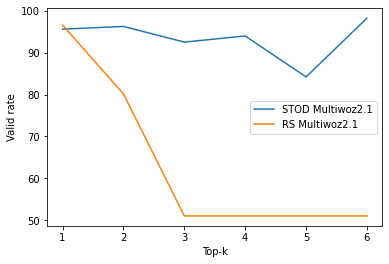

In [14]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6]
#1
plt.plot(x,valid_stod1 , label = "STOD Multiwoz2.1")
plt.plot(x, valid_random_stod1, label = "RS Multiwoz2.1")
plt.xlabel("Number of transformations (k)")
plt.ylabel("Valid rate")
plt.legend()
plt.savefig("1.png")
plt.show()


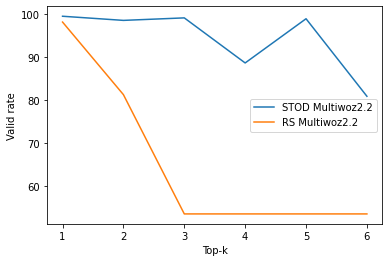

In [9]:
#2
plt.plot(x,valid_stod2 , label = "STOD Multiwoz2.2")
plt.plot(x, valid_random_stod2, label = "RS Multiwoz2.2")
plt.xlabel("Number of transformations (k)")
plt.ylabel("Valid rate")
plt.legend()
plt.savefig("2.png")
plt.show()

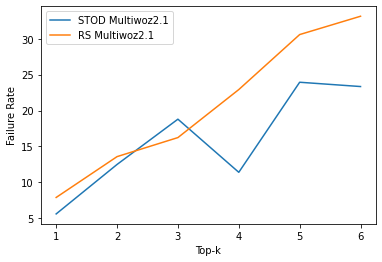

In [10]:
#3
plt.plot(x,acc_stod1 , label = "STOD Multiwoz2.1")
plt.plot(x, acc_r_stod1, label = "RS Multiwoz2.1")
plt.xlabel("Number of transformations (k)")
plt.ylabel("Failure Rate")
plt.legend()
plt.savefig("3.png")
plt.show()

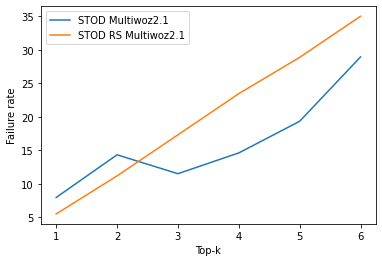

In [15]:
#4
plt.plot(x,acc_stod2 , label = "STOD Multiwoz2.2")
plt.plot(x, acc_r_stod2, label = "STOD RS Multiwoz2.2")
plt.xlabel("Number of transformations (k)")
plt.ylabel("Failure rate")
plt.legend()
plt.savefig("4.png")
plt.show()

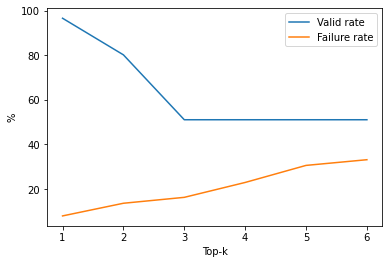

In [12]:
#5
plt.plot(x,valid_random_stod1 , label = "Valid rate")
plt.plot(x, acc_r_stod1, label = "Failure rate")
plt.xlabel("Number of transformations (k)")
plt.ylabel("%")
plt.legend()
plt.savefig("5.png")
plt.show()

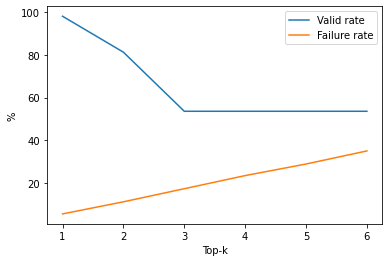

In [13]:
#6
plt.plot(x,valid_random_stod2 , label = "Valid rate")
plt.plot(x, acc_r_stod2, label = "Failure rate")
plt.xlabel("Number of transformations (k)")
plt.ylabel("%")
plt.legend()
plt.savefig("6.png")
plt.show()

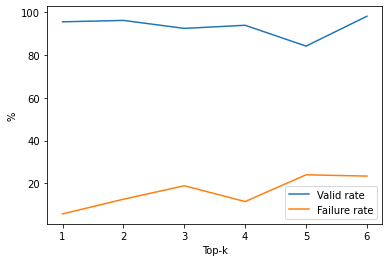

In [14]:
#7
plt.plot(x,valid_stod1 , label = "Valid rate")
plt.plot(x, acc_stod1, label = "Failure rate")
plt.xlabel("Number of transformations (k)")
plt.ylabel("%")
plt.legend()
plt.savefig("7.png")
plt.show()

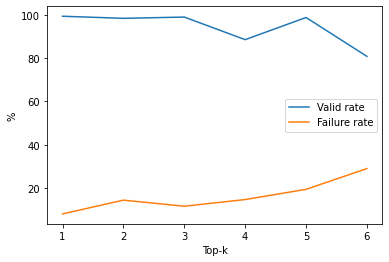

In [15]:
#8
plt.plot(x,valid_stod2 , label = "Valid rate")
plt.plot(x, acc_stod2, label = "Failure rate")
plt.xlabel("Number of transformations (k)")
plt.ylabel("%")
plt.legend()
plt.savefig("8.png")
plt.show()

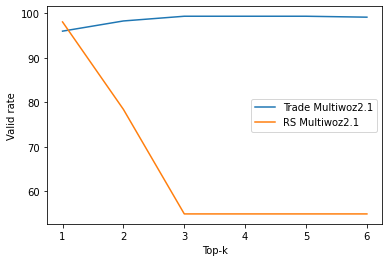

In [28]:
#9
plt.plot(x,valid_trade1 , label = "Trade Multiwoz2.1")
plt.plot(x, valid_random_trade1, label = "RS Multiwoz2.1")
plt.xlabel("Number of transformations (k)")
plt.ylabel("Valid rate")
plt.legend()
plt.savefig("9.png")
plt.show()

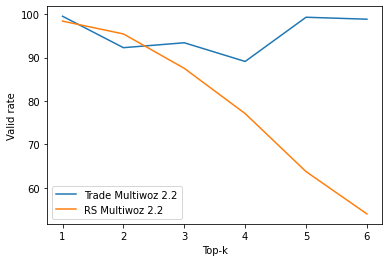

In [29]:
#10
plt.plot(x,valid_trade2 , label = "Trade Multiwoz 2.2")
plt.plot(x, valid_random_trade2, label = "RS Multiwoz 2.2")
plt.xlabel("Number of transformations (k)")
plt.ylabel("Valid rate")
plt.legend()
plt.savefig("10.png")
plt.show()

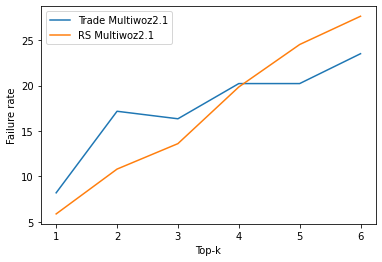

In [18]:
#11
plt.plot(x,acc_trade_1 , label = "Trade Multiwoz2.1")
plt.plot(x, acc_r_trade_1, label = "RS Multiwoz2.1")
plt.xlabel("Number of transformations (k)")
plt.ylabel("Failure rate")
plt.legend()
plt.savefig("11.png")
plt.show()

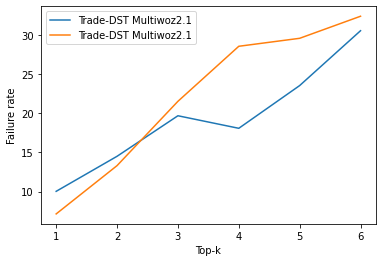

In [16]:
#12
plt.plot(x,acc_trade_2 , label = "Trade-DST Multiwoz2.1")
plt.plot(x, acc_r_trade_2, label = "Trade-DST Multiwoz2.1")
plt.xlabel("Number of transformations (k)")
plt.ylabel("Failure rate")
plt.legend()
plt.savefig("12.png")
plt.show()

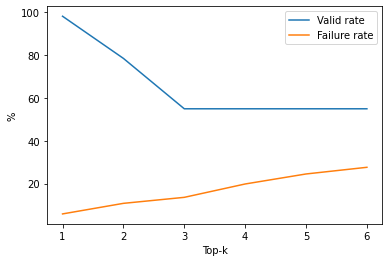

In [24]:
#13
plt.plot(x,valid_random_trade1 , label = "Valid rate")
plt.plot(x, acc_r_trade_1, label = "Failure rate")
plt.xlabel("Number of transformations (k)")
plt.ylabel("%")
plt.legend()
plt.savefig("13.png")
plt.show()

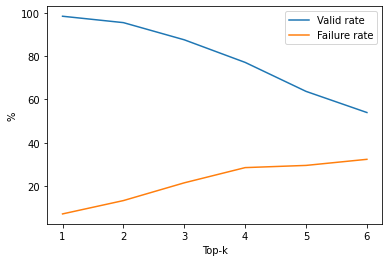

In [25]:
#14
plt.plot(x,valid_random_trade2 , label = "Valid rate")
plt.plot(x, acc_r_trade_2, label = "Failure rate")
plt.xlabel("Number of transformations (k)")
plt.ylabel("%")
plt.legend()
plt.savefig("14.png")
plt.show()

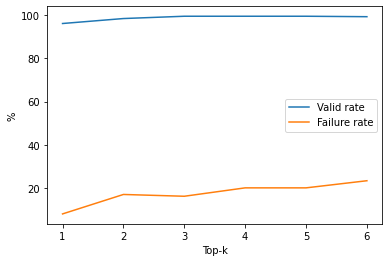

In [26]:
#15
plt.plot(x, valid_trade1 , label = "Valid rate")
plt.plot(x, acc_trade_1, label = "Failure rate")
plt.xlabel("Number of transformations (k)")
plt.ylabel("%")
plt.legend()
plt.savefig("15.png")
plt.show()

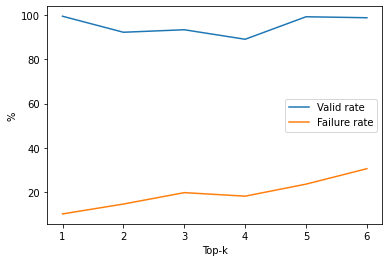

In [27]:
#16
plt.plot(x, valid_trade2 , label = "Valid rate")
plt.plot(x, acc_trade_2, label = "Failure rate")
plt.xlabel("Number of transformations (k)")
plt.ylabel("%")
plt.legend()
plt.savefig("16.png")
plt.show()